In [1]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# 1.Load the dataset

In [60]:
park = pd.read_excel('ParkinsonsData.xlsx')
park.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 2.It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [61]:
park.head(10) #Checking the raw data for missing/null values

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [62]:
park.info() 
#This provides type of attributes and checks the presence of null values in any attribute
#It also shows the dataset has 195 rows and 24 attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

# Pre processing data / cleaning data before proceeding further 

In [63]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array = park.values
X = array[:,1:24]
Y = array[:,17]
Y=Y.astype('int')
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Selected Features:",fit.n_features_) 
print("Feature Ranking:",fit.ranking_)
print("feature selected:",fit.support_ )

Selected Features: 5
Feature Ranking: [13 18 17 14 19 15 16 12  7  1 10  9  8  5 11  6  1  4  1  1  2  1  3]
feature selected: [False False False False False False False False False  True False False
 False False False False  True False  True  True False  True False]


In [64]:
park.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [65]:
# Dropping columns with least significance
park.drop(['name','MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','MDVP:Shimmer(dB)','MDVP:Jitter(%)','Shimmer:DDA'] , axis=1 ,inplace=True)
park.head()

,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.01109,0.04374,0.02182,0.03130,0.02971,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,0.01394,0.06134,0.03134,0.04518,0.04368,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,0.01633,0.05233,0.02757,0.03858,0.03590,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,0.01505,0.05492,0.02924,0.04005,0.03772,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,0.01966,0.06425,0.03490,0.04825,0.04465,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [66]:
park.corr()

,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Jitter:DDP,1.000000,0.759555,0.744894,0.709907,0.737439,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,0.759555,1.000000,0.987625,0.982835,0.950083,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
Shimmer:APQ3,0.744894,0.987625,1.000000,0.960070,0.896645,0.716207,-0.827123,0.347617,0.435242,0.151124,0.610967,0.402243,0.467265,0.645377
Shimmer:APQ5,0.709907,0.982835,0.960070,1.000000,0.949146,0.658080,-0.813753,0.351148,0.399903,0.213873,0.646809,0.457195,0.502174,0.702456
MDVP:APQ,0.737439,0.950083,0.896645,0.949146,1.000000,0.694019,-0.800407,0.364316,0.451379,0.157276,0.673158,0.502188,0.536869,0.721694
NHR,0.919548,0.722194,0.716207,0.658080,0.694019,1.000000,-0.714072,0.189429,0.370890,-0.131882,0.540865,0.318099,0.470949,0.552591
HNR,-0.721494,-0.835271,-0.827123,-0.813753,-0.800407,-0.714072,1.000000,-0.361515,-0.598736,-0.008665,-0.673210,-0.431564,-0.601401,-0.692876
status,0.266646,0.367430,0.347617,0.351148,0.364316,0.189429,-0.361515,1.000000,0.308567,0.231739,0.564838,0.454842,0.340232,0.531039
RPDE,0.342079,0.447424,0.435242,0.399903,0.451379,0.370890,-0.598736,0.308567,1.000000,-0.110950,0.591117,0.479905,0.236931,0.545886
DFA,0.064026,0.159954,0.151124,0.213873,0.157276,-0.131882,-0.008665,0.231739,-0.110950,1.000000,0.195668,0.166548,-0.165381,0.270445


In [67]:
park.columns.values

array(['Jitter:DDP', 'MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'], dtype=object)

In [69]:
park.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
Shimmer:APQ3,195.0,0.015664,0.010153,0.004550,0.008245,0.012790,0.020265,0.056470
Shimmer:APQ5,195.0,0.017878,0.012024,0.005700,0.009580,0.013470,0.022380,0.079400
MDVP:APQ,195.0,0.024081,0.016947,0.007190,0.013080,0.018260,0.029400,0.137780
NHR,195.0,0.024847,0.040418,0.000650,0.005925,0.011660,0.025640,0.314820
HNR,195.0,21.885974,4.425764,8.441000,19.198000,22.085000,25.075500,33.047000
status,195.0,0.753846,0.431878,0.000000,1.000000,1.000000,1.000000,1.000000
RPDE,195.0,0.498536,0.103942,0.256570,0.421306,0.495954,0.587562,0.685151
DFA,195.0,0.718099,0.055336,0.574282,0.674758,0.722254,0.761881,0.825288


In [74]:
# Removing outliers from whole dataset (not preferred ,just checking)
Q1 = park.quantile(0.25)
Q3 = park.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Jitter:DDP      0.006520
MDVP:Shimmer    0.021380
Shimmer:APQ3    0.012020
Shimmer:APQ5    0.012800
MDVP:APQ        0.016320
NHR             0.019715
HNR             5.877500
status          0.000000
RPDE            0.166256
DFA             0.087124
spread1         1.403904
spread2         0.104883
D2              0.537330
PPE             0.115529
dtype: float64


In [76]:
park_df = park[~((park < (Q1 - 1.5 * IQR)) |(park > (Q3 + 1.5 * IQR))).any(axis=1)]
park_df.shape # nearly 74 rows deleted

(121, 14)

In [77]:
park.shape # original dataset

(195, 14)

In [ ]:
# Removing outliers in data from particular columns

In [78]:
# Drop all the columns with outliers in a new df(A)
A = park.drop(['NHR','HNR','RPDE','DFA','spread1','D2'], axis=1)

# Copy all the columns with outliers in a new df(B) 
B = park[['NHR','HNR','RPDE','DFA','spread1','D2']]

In [79]:
B.shape

(195, 6)

In [80]:
Q1 = park.quantile(0.25)
Q3 = park.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Jitter:DDP      0.006520
MDVP:Shimmer    0.021380
Shimmer:APQ3    0.012020
Shimmer:APQ5    0.012800
MDVP:APQ        0.016320
NHR             0.019715
HNR             5.877500
status          0.000000
RPDE            0.166256
DFA             0.087124
spread1         1.403904
spread2         0.104883
D2              0.537330
PPE             0.115529
dtype: float64


In [81]:
B1 = B[~((B < (Q1 - 1.5 * IQR)) |(B > (Q3 + 1.5 * IQR))).any(axis=1)]
B1.shape # only 11 rows removed as per original

(174, 6)

In [82]:
park_new_df = pd.concat([A, B1], axis = 1)
park_new_df.sample(10)

,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,status,spread2,PPE,NHR,HNR,RPDE,DFA,spread1,D2
100,0.06433,0.09178,0.05358,0.04791,0.06196,1,0.260481,0.370961,NaN,NaN,NaN,NaN,NaN,NaN
117,0.00731,0.01725,0.00757,0.00971,0.01652,1,0.372114,0.282780,0.01802,25.690,0.486738,0.676023,-4.597834,2.975889
108,0.00225,0.01024,0.00455,0.00576,0.00993,1,0.160686,0.115130,0.00238,29.928,0.311369,0.676066,-6.739151,2.296873
12,0.00355,0.01259,0.00656,0.00717,0.01140,1,0.152813,0.138512,0.00581,25.703,0.460600,0.646846,-6.547148,2.041277
147,0.02546,0.06050,0.02865,0.04101,0.06359,1,0.355736,0.336085,NaN,NaN,NaN,NaN,NaN,NaN
77,0.00677,0.02199,0.01284,0.01199,0.01636,1,0.250572,0.232744,0.00420,25.820,0.429484,0.816340,-5.391029,1.777901
40,0.00496,0.01495,0.00774,0.00941,0.01233,1,0.201095,0.130554,0.00231,26.822,0.326480,0.765623,-6.647379,2.374073
143,0.00568,0.01997,0.01117,0.01177,0.01506,1,0.213353,0.189032,0.02010,18.687,0.536102,0.632631,-5.898673,2.470746
163,0.00873,0.01756,0.00967,0.01033,0.01363,1,0.184896,0.212386,0.01435,21.219,0.557045,0.673086,-5.617124,1.871871
129,0.00349,0.01022,0.00476,0.00588,0.00903,1,0.195976,0.183572,0.00487,26.369,0.491345,0.718839,-5.892061,2.108873


In [84]:
#Removing NaN from the dataframe by replacing with mean
#'NHR','HNR','RPDE','DFA','spread1','D2'
park_new_df['NHR'].fillna((park_new_df['NHR'].mean()),inplace=True)
park_new_df['HNR'].fillna((park_new_df['HNR'].mean()),inplace=True)
park_new_df['RPDE'].fillna((park_new_df['RPDE'].mean()),inplace=True)
park_new_df['DFA'].fillna((park_new_df['DFA'].mean()),inplace=True)
park_new_df['spread1'].fillna((park_new_df['spread1'].mean()),inplace=True)
park_new_df['D2'].fillna((park_new_df['D2'].mean()),inplace=True)

park_new_df.sample(10)

,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,status,spread2,PPE,NHR,HNR,RPDE,DFA,spread1,D2
92,0.00750,0.04190,0.02383,0.02521,0.03051,1,0.087840,0.186489,0.01914,18.780,0.454444,0.734504,-5.952058,2.344336
76,0.00810,0.03999,0.02413,0.02231,0.02704,1,0.341169,0.193918,0.00905,23.370,0.489538,0.789977,-5.775966,2.007923
104,0.00229,0.01030,0.00469,0.00582,0.00871,1,0.144780,0.093193,0.00243,28.409,0.263654,0.691483,-7.111576,2.065477
106,0.00204,0.01064,0.00522,0.00632,0.00928,1,0.184550,0.106802,0.00233,29.746,0.334171,0.677930,-6.981201,2.129924
62,0.00457,0.01643,0.00867,0.01108,0.01200,0,0.095882,0.103224,0.00340,25.856,0.364867,0.694399,-6.966321,2.278687
79,0.01865,0.03121,0.01773,0.01783,0.02139,1,0.265699,0.277948,0.02220,19.200,0.594387,0.790117,-4.913885,2.398422
34,0.00283,0.00958,0.00468,0.00610,0.00726,0,0.163519,0.044539,0.00065,33.047,0.340068,0.741899,-7.964984,1.423287
142,0.00546,0.03527,0.02055,0.02076,0.02530,1,0.310746,0.209863,0.01728,18.702,0.606273,0.661735,-5.585259,2.465528
93,0.00574,0.05925,0.03341,0.03794,0.04398,1,0.173520,0.160809,0.01211,20.969,0.447456,0.697790,-6.152551,2.080121
134,0.00873,0.04932,0.02683,0.03112,0.03651,1,0.320385,0.243080,0.03031,17.060,0.637814,0.744064,-5.301321,2.375138


In [86]:
park_new_df.corr()

,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,status,spread2,PPE,NHR,HNR,RPDE,DFA,spread1,D2
Jitter:DDP,1.000000,0.759555,0.744894,0.709907,0.737439,0.266646,0.324377,0.671005,0.243736,-0.244757,0.137322,0.115629,0.249976,0.083665
MDVP:Shimmer,0.759555,1.000000,0.987625,0.982835,0.950083,0.367430,0.452025,0.693771,0.451084,-0.535388,0.297399,0.149145,0.371627,0.234454
Shimmer:APQ3,0.744894,0.987625,1.000000,0.960070,0.896645,0.347617,0.402243,0.645377,0.456437,-0.553764,0.286196,0.157998,0.349640,0.220536
Shimmer:APQ5,0.709907,0.982835,0.960070,1.000000,0.949146,0.351148,0.457195,0.702456,0.417132,-0.527884,0.262420,0.179052,0.384970,0.234339
MDVP:APQ,0.737439,0.950083,0.896645,0.949146,1.000000,0.364316,0.502188,0.721694,0.388226,-0.451655,0.304873,0.098798,0.354164,0.228078
status,0.266646,0.367430,0.347617,0.351148,0.364316,1.000000,0.454842,0.531039,0.302443,-0.355539,0.265819,0.233977,0.560738,0.304342
spread2,0.324377,0.452025,0.402243,0.457195,0.502188,0.454842,1.000000,0.644711,0.247608,-0.256055,0.382319,0.168293,0.493139,0.348064
PPE,0.671005,0.693771,0.645377,0.702456,0.721694,0.531039,0.644711,1.000000,0.306155,-0.437635,0.395238,0.298947,0.741948,0.219472
NHR,0.243736,0.451084,0.456437,0.417132,0.388226,0.302443,0.247608,0.306155,1.000000,-0.747380,0.558001,-0.157190,0.467713,0.477285
HNR,-0.244757,-0.535388,-0.553764,-0.527884,-0.451655,-0.355539,-0.256055,-0.437635,-0.747380,1.000000,-0.609445,-0.013098,-0.564860,-0.447971


# 3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

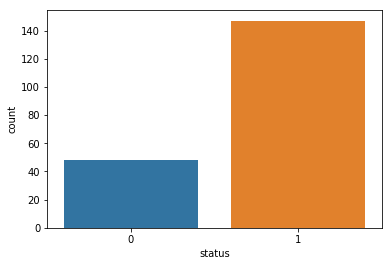

In [72]:
#Univariate Analysis
sns.countplot(x='status', data=park)
#As per given data more number of patients have parkinson's disease. 

In [85]:
park.apply(pd.Series.nunique)

Jitter:DDP      180
MDVP:Shimmer    188
Shimmer:APQ3    184
Shimmer:APQ5    189
MDVP:APQ        189
NHR             185
HNR             195
status            2
RPDE            195
DFA             195
spread1         195
spread2         194
D2              195
PPE             195
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C99261C6A0>,
      dtype=object)

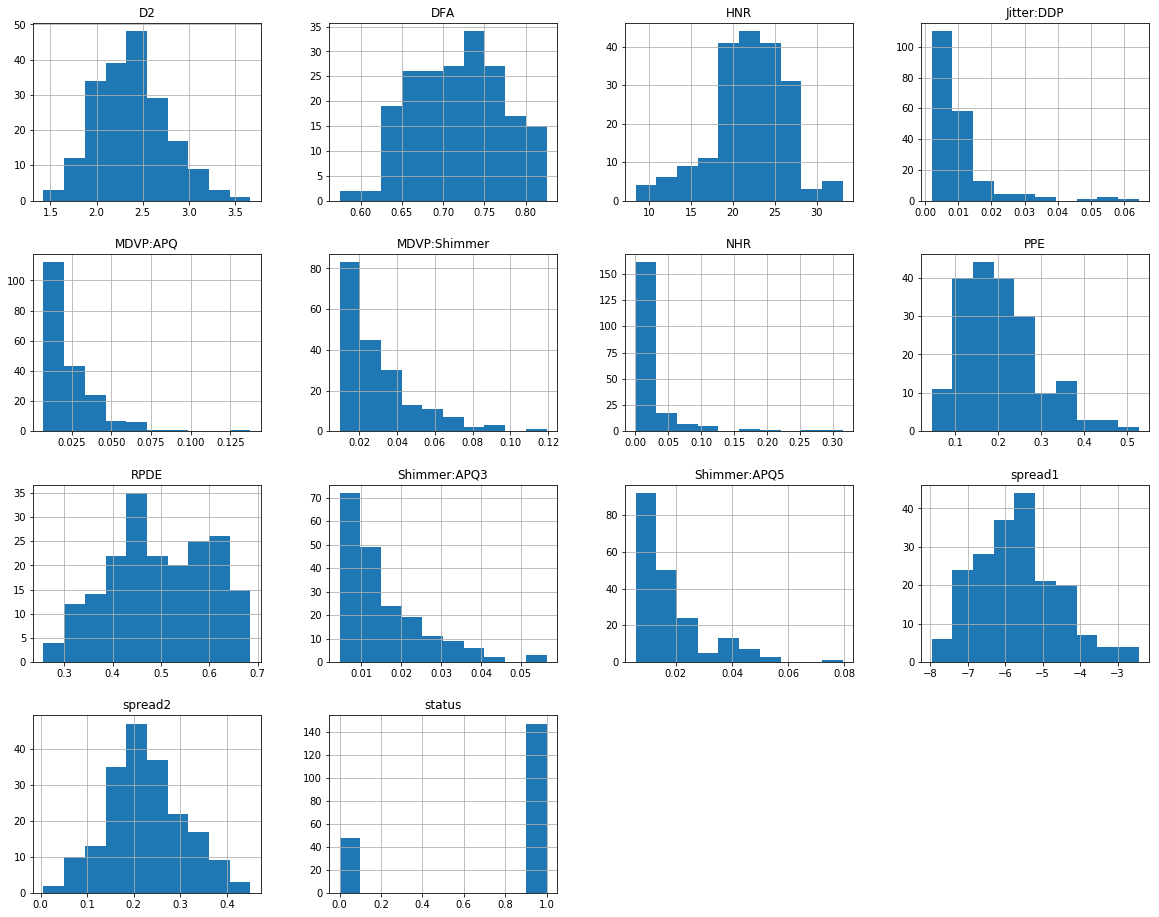

In [216]:
# Histogram representation - univariate analysis 
park.hist(figsize=[20,16])

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
park.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
Shimmer:APQ3,195.0,0.015664,0.010153,0.004550,0.008245,0.012790,0.020265,0.056470
Shimmer:APQ5,195.0,0.017878,0.012024,0.005700,0.009580,0.013470,0.022380,0.079400
MDVP:APQ,195.0,0.024081,0.016947,0.007190,0.013080,0.018260,0.029400,0.137780
NHR,195.0,0.024847,0.040418,0.000650,0.005925,0.011660,0.025640,0.314820
HNR,195.0,21.885974,4.425764,8.441000,19.198000,22.085000,25.075500,33.047000
status,195.0,0.753846,0.431878,0.000000,1.000000,1.000000,1.000000,1.000000
RPDE,195.0,0.498536,0.103942,0.256570,0.421306,0.495954,0.587562,0.685151
DFA,195.0,0.718099,0.055336,0.574282,0.674758,0.722254,0.761881,0.825288


In [ ]:
# Observations from the data set
#
# 1. Jitter:DDP - It is a measure of variation in fundamental frequency
#               - It is slightly right tailed or right skewed in nature relative to high central values
#               - Mean and median differ but not much 
#               - Presence of outliers on higher or right end of central values
#
# 2. MDVP:Shimmer - Several measures of variation in amplitude
#                 - It is right tailed or right skewed in nature.
#                 - Mean and median differ but not much
#                 - Presence of outliers on higher or right end of central values
#
# 3. Shimmer:APQ3 - Several measures of variation in amplitude.
#                 - It is right tailed or right skewed in nature.
#                 - Mean and median differ but not much  
#                 - Presence of outliers on higher or right end of central values
#
# 4. Shimmer:APQ5 - Several measures of variation in amplitude
#                 - it is right tailed or right skewed in nature.
#                 - Mean and median differ but not much 
#                 - Presence of outliers on higher or right end of central values
#                 
# 5. MDVP:APQ - Several measures of variation in amplitude
#             - it is right tailed or right skewed in nature.
#             - Mean and median differ but not much
#             - Presence of outliers on higher or right end of central values
#
# 6. NHR   - One of the two measures of ratio of noise to tonal components in the voice
#          - it is right tailed or right skewed in nature.
#          - Mean and median differ but not much
#          - Presence of outliers on higher or right end of central values
#
# 7. HNR   - One of the two measures of ratio of noise to tonal components in the voice
#           - Mean and median differ but not much
#           - It is left tailed or left skewed in nature.
#           - Presence of outliers on lower or left end of central values
#
# 8. status   - Health status of the subject (1) - Parkinson's, (0) - healthy
#             - It is our target column
#             
# 9. RPDE  -  One of the two nonlinear dynamical complexity measures
#          - Data is in the form of bell curve 
#          - Mean and median values are almost equal.
#          - Data is evenly distributed
#          - Minimum or no outliers present in this column
#
# 10. DFA - It represents the signal fractal scaling exponent
#         - Data contain a major peak another small peak at right tail end.
#         - Mean and median differ but not much
#         - Presence of few outliers on higher or right end of central values
#
# 11. spread1 -One of the three nonlinear measures of fundamental frequency variation 
#             - it is very slightly right tailed or right skewed in nature.
#             - Mean and median are in negative, data would have to be scaled. 
#             - Presence of few outliers on higher or right end of central values
#
# 12. spread2 - One of the three nonlinear measures of fundamental frequency variation 
#              - it is very slightly left tailed or left skewed in nature.
#              - Mean and median differ but not much
#              - Presence of outliers on lower or left end of central values
#
# 13. D2 - One of the two nonlinear dynamical complexity measures
#           - Data is evenly distributed , representing a bell curve.
#           - Mean and median differ but not much
#           - Minimum or no outliers present in this column
#
# 14. PPE - One of the three nonlinear measures of fundamental frequency variation 
#         - Mean and median differ but not much
#         - Data is evenly distributed , representing a bell curve.
#         - Minimum or no outliers present in this column    

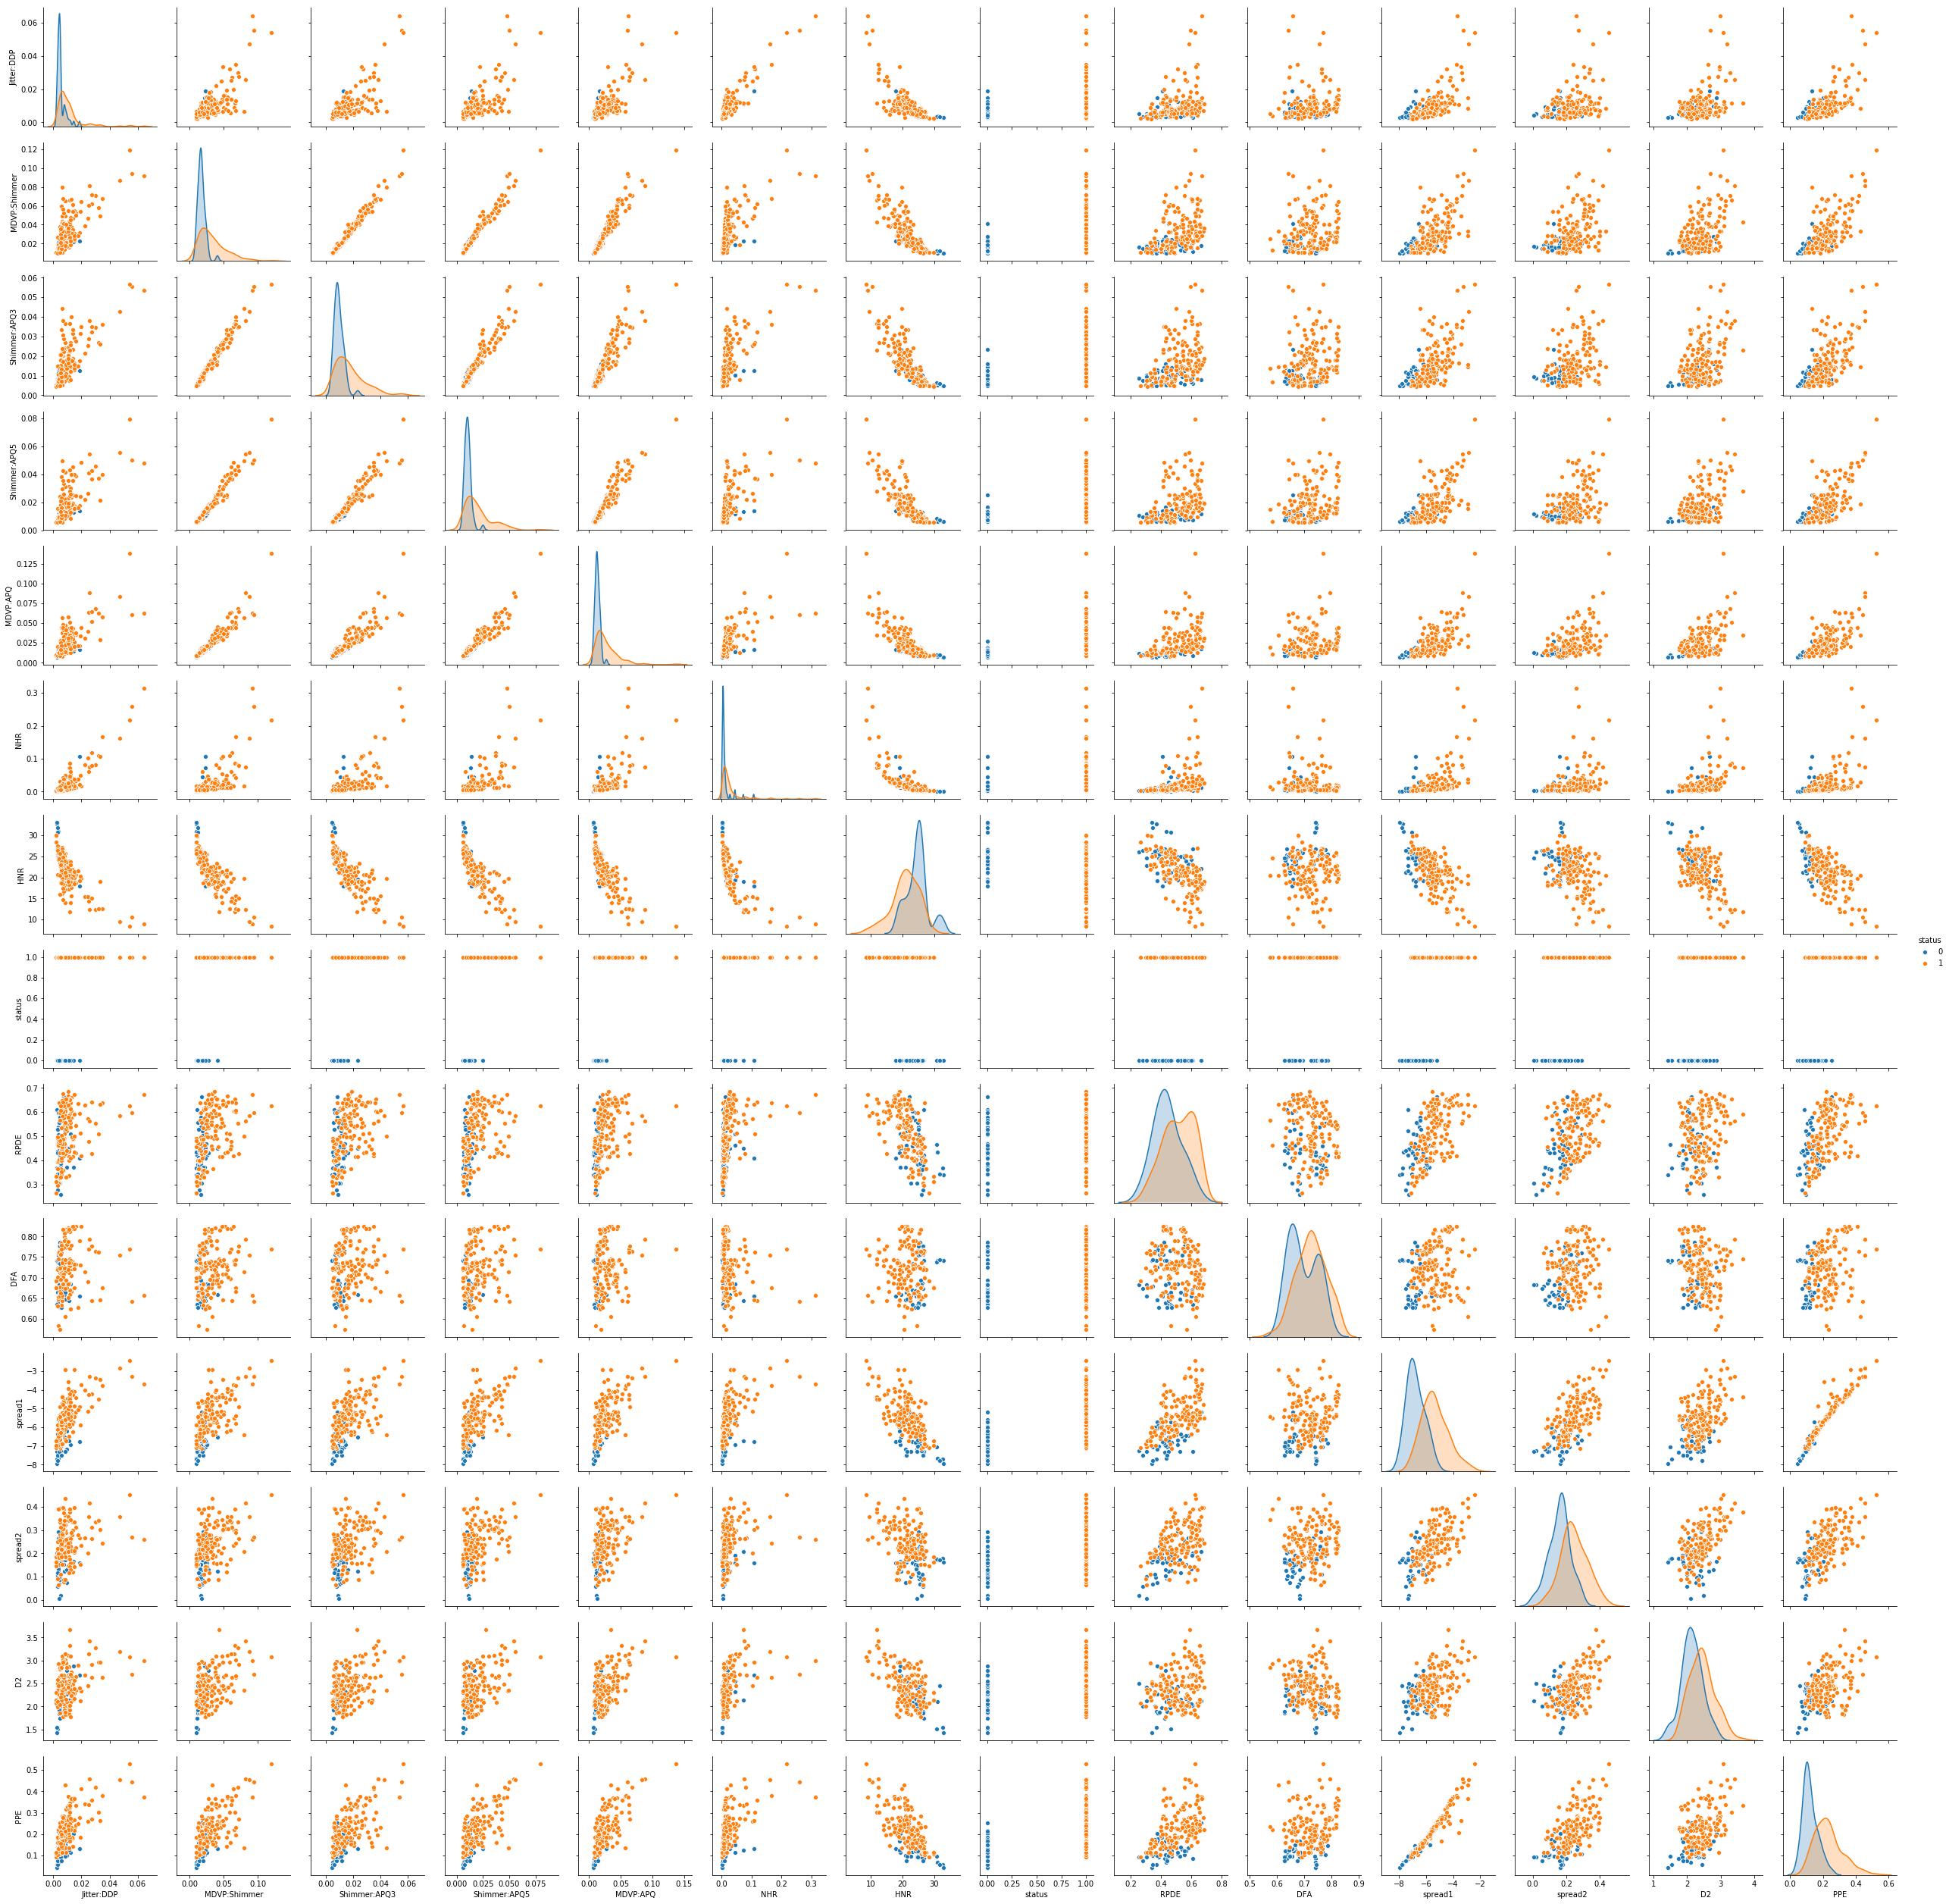

In [204]:
#Bivariate analysis
sns.pairplot(park, hue = "status")

# 4.Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [88]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn import preprocessing

# scale all the columns of the bank(dataFrame). This will produce a numpy array
park_scaled = preprocessing.scale(park)
park_scaled

array([[ 0.13175532,  0.74598495,  0.60785907, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [ 0.45268371,  1.68173116,  1.54791153, ...,  1.31118546,
         0.27507712,  1.80360503],
       [ 0.72181312,  1.2026929 ,  1.17564285, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.9920686 , -0.3524535 , -0.29467029, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 0.13175532, -0.35883359, -0.29763264, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [-0.12048313, -0.57788327, -0.53363321, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [90]:
#convert the numpy array back into a dataframe 
park_scaled = pd.DataFrame(park_scaled, columns=park.columns)

#browse the contents of the dataframe. Check that all the values are now z scores
park_scaled.head()

,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.131755,0.745985,0.607859,1.119147,0.332985,-0.067893,-0.193225,0.571429,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,0.452684,1.681731,1.547912,2.276504,1.159454,-0.137843,-0.634508,0.571429,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,0.721813,1.202693,1.175643,1.726176,0.699187,-0.291633,-0.279760,0.571429,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,0.577677,1.340396,1.340547,1.848749,0.806859,-0.280719,-0.281346,0.571429,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,1.096793,1.836448,1.899444,2.532491,1.216839,-0.178026,-0.506745,0.571429,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082


In [91]:
# capture the target column ("status") into separate vectors for training set and test set

X = park.drop("status" , axis=1)

y = park['status']

In [92]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

# 5.Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [139]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')# , max_depth = 5, random_state = 100)

In [140]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 6.Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [120]:
from sklearn import metrics

In [141]:
y_predict = dt_model.predict(X_test)

In [142]:
print(dt_model.score(X_train , train_labels))
print(dt_model.score(X_test , test_labels))

1.0
0.7966101694915254


In [143]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[10  9]
 [ 3 37]]


In [205]:
from sklearn.model_selection import cross_val_score

In [206]:
rfc_cv_score = cross_val_score(model, X,y, cv=10, scoring='accuracy')
rfc_cv_score

array([0.95      , 0.9       , 0.85      , 0.85      , 1.        ,
       0.75      , 0.65      , 0.73684211, 0.88888889, 0.83333333])

In [207]:
rfc_cv_score.mean()

0.840906432748538

# 7.Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [ ]:
# Regularising the Decision Tree

In [144]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Park_Tree_File = open('park_tree.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=Park_Tree_File, feature_names = list(X_train))

Park_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Jitter:DDP    0.069182
MDVP:Shimmer  0.000000
Shimmer:APQ3  0.194958
Shimmer:APQ5  0.000000
MDVP:APQ      0.000000
NHR           0.000000
HNR           0.000000
RPDE          0.038358
DFA           0.000000
spread1       0.000000
spread2       0.036239
D2            0.274000
PPE           0.387263


In [126]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng park_tree_regularized.dot -o park_tree_regularized.png")

1

In [145]:
y_predict = reg_dt_model.predict(X_test)

In [146]:
reg_dt_model.score(X_test , test_labels)

0.8135593220338984

In [147]:
print(metrics.confusion_matrix(test_labels, y_predict))

[[11  8]
 [ 3 37]]


In [ ]:
# Impact 
#
# -> We can see clearly model's accuracy is increased (nearly 2 % increase) after regularization of parameters
# -> Also the confusion matrix shows increase True results (true positive + true negatives) = 48 (previously 47)

In [ ]:
# Regularization helps to solve over fitting problem in machine learning.
#
# Simple model will be a very poor generalization of data. 
# At the same time, complex model may not perform well in test data due to over fitting. 
# We need to choose the right model in between simple and complex model.
# Regularization helps to choose preferred model complexity, so that model is better at predicting.
# Regularization adds a penalty term to the objective function and control the model complexity using that penalty term. 
# It can be used for many machine learning algorithms.

# Also,
# If left to its own the machine/device will continue to fit the tree till each data point is a different leaf in the tree. 

# Regularization (as any means to prevent overfit) for Trees is done by:

# 1) Limiting max. depth of trees
# 2) Ensembles / bag more than just 1 tree
# 3) Setting stricter stopping criterion on when to split a node further (e.g. min_samples_leaf, max_depth etc.)


 # 8.Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [200]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_jobs=2,n_estimators=120,criterion="entropy",random_state=100)
random_forest_model.fit(X_train,train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=2,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [201]:
random_forest_model.score(X_test , test_labels)

0.847457627118644

In [202]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(test_labels, y_predict))

[[10  9]
 [ 1 39]]


In [221]:
# Setup the hyperparameter grid
from sklearn.model_selection import GridSearchCV
dep = np.arange(1,9)
param_grid = {'max_depth' : dep}

# Instantiate a decision tree classifier: clf
clf = tree.DecisionTreeClassifier()

# Instantiate the GridSearchCV object: clf_cv
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit it to the data
clf_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 1}
Best score is 0.7794871794871795


In [ ]:
# What is the optimal number of trees that gives the best result?
#
# n_estimators is the number of trees you want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees give you better performance but makes your code slower. 
# You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.
# As mentioned by some blogs a random forest should have a number of trees between 64 - 128 trees

# At some point performance and speed will be more important than your accuracy, and that's when you need to decide what's more important.
# Let's say at n_estimators = 100 you have 0.2 error and it took you ~10 minutes to run (depends on your data, just a rough estimate).
# However, at n_estimators = 1000 your error rate is 0.18, but it took you ~25 mintues to run. 
# Is that extra 15 minutes worth the 0.02 improvement? It all depends on type of data you're working with.
#
# So as far as i can understand ,it depends on your requirement and whether you want better performance and speed or better accuracy.

In [ ]:
# [Note]
# Post checking, the number of trees from range 50 - 110 gives 0.8305 accuracy 
# Whereas 120 - 500 gives 0.847 accuracy. 
# An extremely small difference has been observed, however with 500 trees code takes more time to execute.  